In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [5]:
normal_images_path = r'C:\Users\BIT\Documents\btech1078122\archive 1\brain_tumor_dataset\no' # Replace the path with your data having no tumor
tumor_images_path = r'C:\Users\BIT\Documents\btech1078122\archive 1\brain_tumor_dataset\yes' # replace path with with dataset location having tumor


In [6]:
normal_images = os.listdir(normal_images_path)
tumor_images = os.listdir(tumor_images_path)


Normal Images:


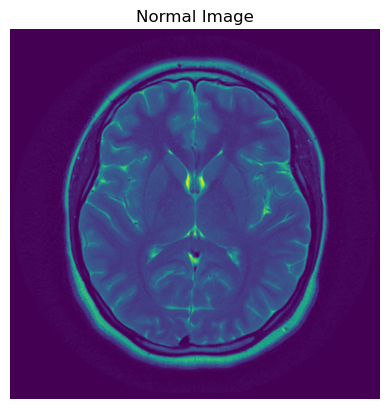

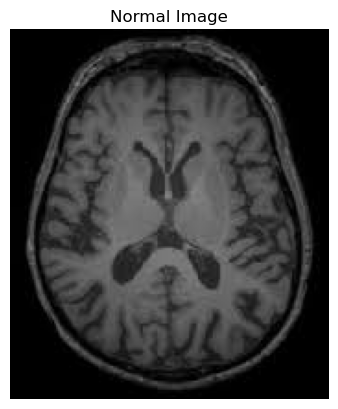

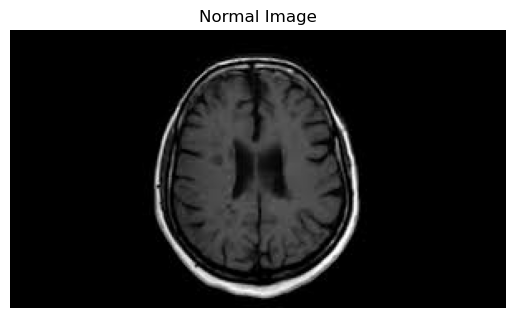

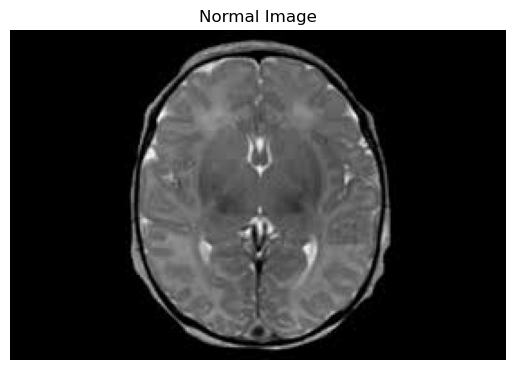

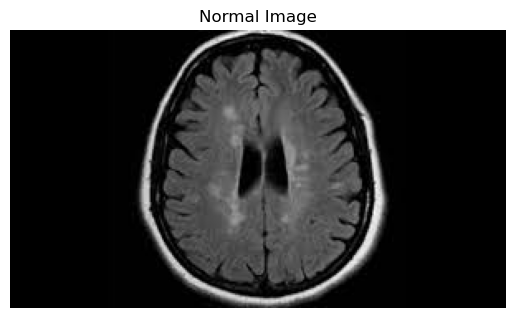

Tumor Images:


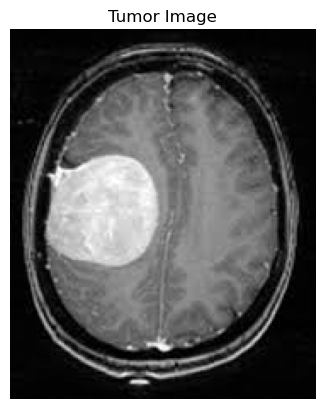

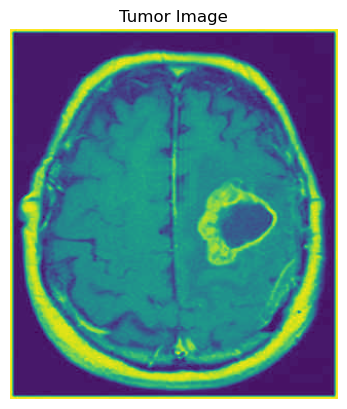

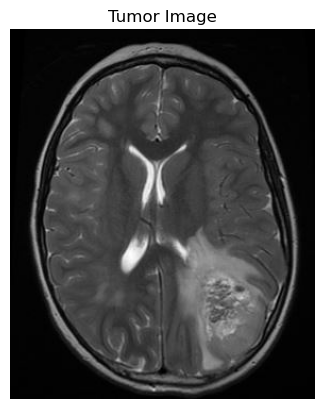

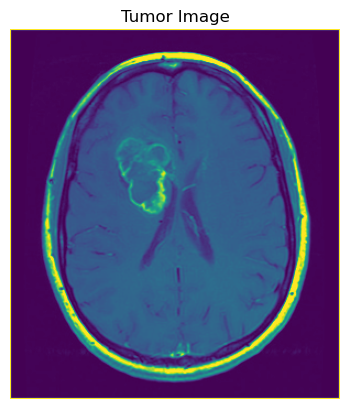

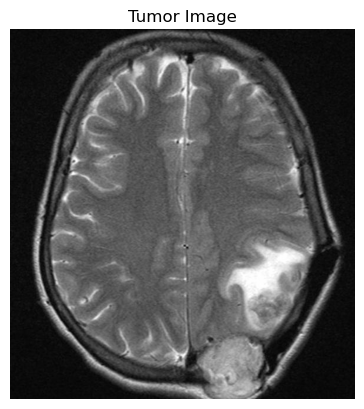

In [7]:
# Display Normal Images
print("Normal Images:")
for img in normal_images[:5]:  # Adjust the slice as needed
    img_path = os.path.join(normal_images_path, img)
    img_data = mpimg.imread(img_path)
    plt.imshow(img_data)
    plt.axis('off')  # Turn off axis labels
    plt.title('Normal Image')
    plt.show()

# Display Tumor Images
print("Tumor Images:")
for img in tumor_images[:5]:  # Adjust the slice as needed
    img_path = os.path.join(tumor_images_path, img)
    img_data = mpimg.imread(img_path)
    plt.imshow(img_data)
    plt.axis('off')  # Turn off axis labels
    plt.title('Tumor Image')
    plt.show()


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [9]:
image_files = os.listdir(normal_images_path)
sample_image_file = image_files[0]
sample_image_path = os.path.join(normal_images_path, sample_image_file)

In [10]:
sample_image = load_img(sample_image_path)
sample_array = img_to_array(sample_image)
sample_array = sample_array.reshape((1,) + sample_array.shape)

In [11]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)

In [12]:
augmented_images = []
for batch in datagen.flow(sample_array, batch_size=1):
    augmented_images.append(batch[0].astype('uint8'))
    if len(augmented_images) >= 5:
        break

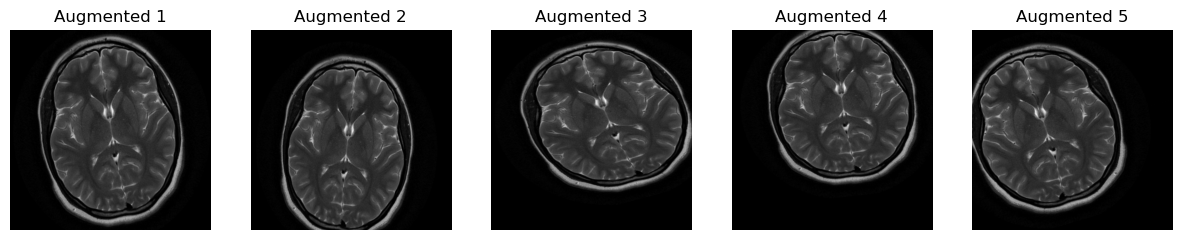

In [13]:
plt.figure(figsize=(15, 5))
for i, img in enumerate(augmented_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Augmented {i+1}')
plt.show()